# Case Study on Correlation and Regression
   A textile company regularly spent money on five advertising companies for their
ads. ( Add_sales_data_2018.csv)
1. First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.
2. Build a regression model to predict the profit from the given data and
comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the
following amount for advertisement.
   |Advt. of company|	Amound Spent|
|----------------|--------------|
|Add1(in Thousands)|	290|
|Add2(in Thousands)|	312|
|Add3(in Thousands)|	309|
|Add4(in Thousands)|	298|
|Add5(in Thousands)|	320|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
add=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
add.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
add.shape

(205, 7)

In [5]:
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
add.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
add.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### Observations:
    1.The given data set contains, the amount spent by a textile company for advertising on five different companies and
      profit generated to the company.
    2.The dataset has 7 columns and 6 features, since profit is being the target(dependent variable).
    3.There is no null or missing values in the data set.
    4.Except the date feature (object data type),  all others are float with 64 bit datatype.
    5.There are 205 observations are included within this data set.

## 1. First of all, check whether there is any relationship between the amount spent for  advertising through five different companies and profit generated.

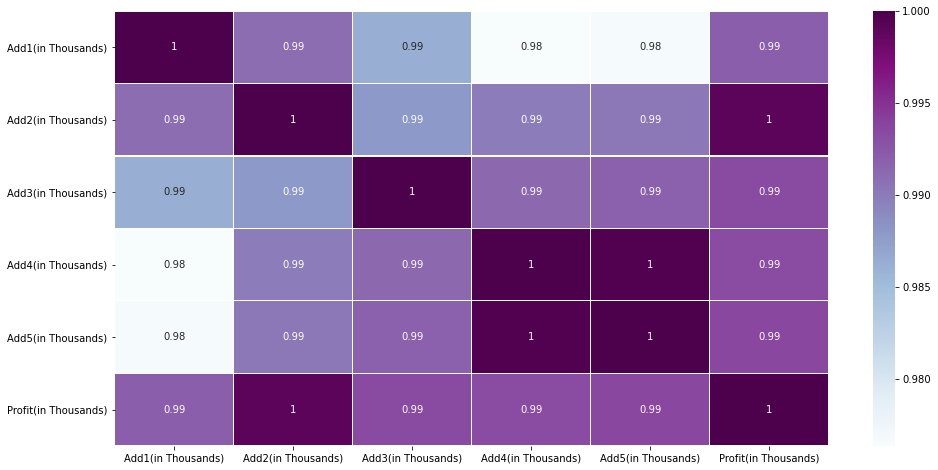

In [13]:
corrmatrix=add.corr()
plt.subplots(figsize=(16,8))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3,cmap="BuPu")
plt.show()

### Inferences:-
    1 From the heatmap, we can find a strong/ postive correlation with the variables.
    2. Among the 5 features, Add2 has strong positive corelation(r=1).
    3. Also, Add1, Add3, Add4, Add5 has same positive correlation(r=0.99).

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

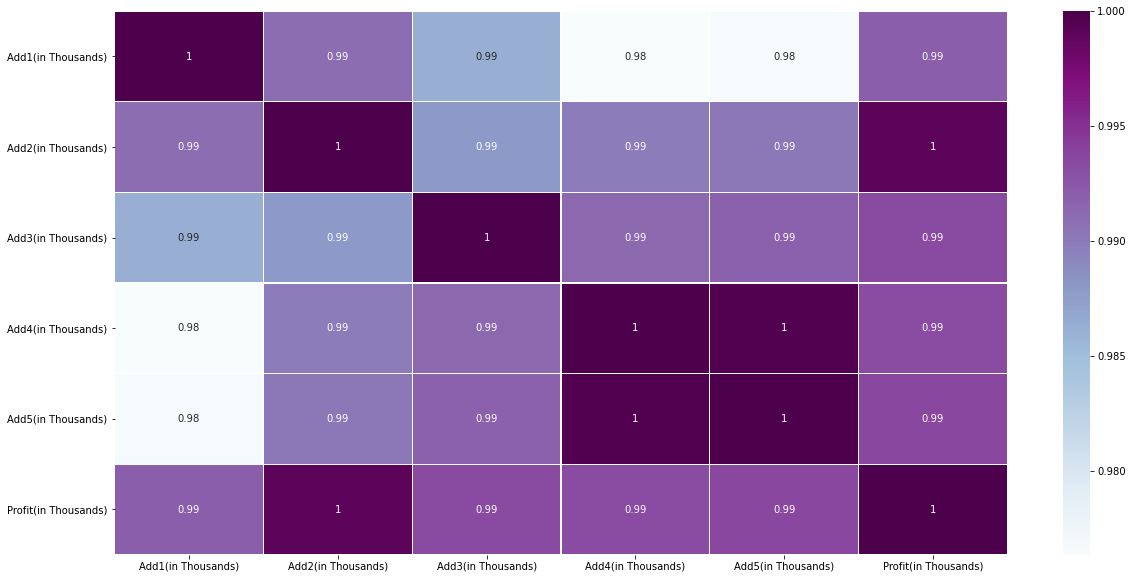

In [15]:
corrmatrix=add.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.3,cmap="BuPu")
plt.show()

### Inference:
    From the aove matrix, we can see the correlations between the variables that are available in the data set.
    1. By close observation we can see that Add4 & Add5 have same strong positive correlation coefficient of 1, within the            dataset.
    2. So, we can remove features with comparitively low r value with the target variable(Profit).
    3. Therefore, we can drop Add4 or Add5(Add4,5 have same r value with Profit i.e(r=0.99), so we can keep any one of them).

In [21]:
add.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [23]:
add.shape

(205, 7)

### Model 
    The model built by dropping Add5 only.

In [26]:
add1=add.drop(['Add5(in Thousands)','Date'],axis=1)
add1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [27]:
add1.shape

(205, 5)

In [28]:
## spliting the dataset into x1,y1
y1=add1['Profit(in Thousands)']
x1=add1.drop(['Profit(in Thousands)'],axis=1)

## spliting the reduced data set into 4 set
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.20)
lr1=linear_model.LinearRegression() # importing linear regression model. 
model1=lr1.fit(x1_train,y1_train) #Training the model with xtrain and ytrain datas.

## we have 3 independant variable (feature)
x1.shape

(205, 4)

In [30]:
predictions1=model1.predict(x1_test) # testing the model using xtest.

In [31]:
print('The Original outputs are:\n',y1_test,'\n') # y1_test is the original output
print((y1_test.nunique()),'Observations are taken for testing \n')
print('The Predicted outputs are :\n',predictions1)


The Original outputs are:
 15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64 

41 Observations are taken for testing 

The Predicted outputs are :
 [4150.88700813 4447.123006   5133.28546277 4908.25686327 5002.12811755
 4624.1739032  5383.8896779  5327.97676463 5175.57404328 5956.5394452
 5780.87352179 4996.81271079 5076.05241064 5785.509923   4935.

In [32]:
mse1=mean_squared_error(y1_test,predictions1)
print('MSE is :',mean_squared_error(y1_test,predictions1))
print('Rounded MSE Value is %0.2f'%mean_squared_error(y1_test,predictions1))
rsquare1=r2_score(y1_test,predictions1)
print('R^2 Value :',r2_score(y1_test,predictions1))
print('Rounded R^2 Value : %0.2f'%r2_score(y1_test,predictions1))

MSE is : 0.5996189651147589
Rounded MSE Value is 0.60
R^2 Value : 0.9999968795271845
Rounded R^2 Value : 1.00


In [34]:
var1_test = y1_test.var()
Adj1_rsq = 1-(mse1/var1_test)
print('Adjusted R^2 Value:',Adj1_rsq)
print('Rounded adjusted R^2 Value: %0.2f'% Adj1_rsq)

Adjusted R^2 Value: 0.9999969556362777
Rounded adjusted R^2 Value: 1.00


In [35]:
model1.intercept_ # y intercept value.

-0.13505967448509182

In [36]:
model1.coef_ # Since there 3 independant variables, we get 3 coefficients.

array([ 0.96996893, 12.43964043,  3.54998533,  1.82051588])

### Inferences:
    1. Mean squared value of the model created is 0.60.
    2. From the correlation matrix and from the value of coefficient(r) it is well evident that Add2 company is highly influencial on the target profit. So it will be a good practice, that focusing more on advertisement to Add2 company will be beneficial for the textile company.
    3. We can also have another model which contain all the advertisement company, so that we can have their individual impact on profit making .

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
  
|Advt. of company|	Amound Spent|
|----------------|--------------|
|Add1(in Thousands)|	290|
|Add2(in Thousands)|	312|
|Add3(in Thousands)|	309|
|Add4(in Thousands)|	298|
|Add5(in Thousands)|	320|


In [37]:
make_prediction1=[[290,312,309,298]]## Since we have created model by dropping Add5.
print('Predicted profit is:',(model1.predict(make_prediction1).item()))
print('Rounded value of predicted profit is:%0.2f'%(model1.predict(make_prediction1).item()))

Predicted profit is: 5801.782943878437
Rounded value of predicted profit is:5801.78


### Inferences:-
    1.Add2 company have very high influence in the profit generated to the textile company, so better to keep them in future         too.
    2.If we are creating another model with all the advt company, then it may bring much more predicted profit, since it             contains Add5 company also.

### KARUNNIA MENON M . DSA NORKA BATCH-3